<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocess-Scrapped-Data" data-toc-modified-id="Preprocess-Scrapped-Data-1">Preprocess Scrapped Data</a></span></li><li><span><a href="#PeopleOfInformatics.csv:" data-toc-modified-id="PeopleOfInformatics.csv:-2"><code>PeopleOfInformatics</code>.csv:</a></span><ul class="toc-item"><li><span><a href="#Check-for-duplicated-names" data-toc-modified-id="Check-for-duplicated-names-2.1">Check for duplicated <code>names</code></a></span></li><li><span><a href="#Check-the-institute-field" data-toc-modified-id="Check-the-institute-field-2.2">Check the <code>institute</code> field</a></span></li><li><span><a href="#Create-a-mapping-for-the-institutes-found" data-toc-modified-id="Create-a-mapping-for-the-institutes-found-2.3">Create a mapping for the <code>institutes</code> found</a></span></li><li><span><a href="#Alias/shortnames" data-toc-modified-id="Alias/shortnames-2.4">Alias/shortnames</a></span></li></ul></li><li><span><a href="#publications.csv-:" data-toc-modified-id="publications.csv-:-3"><code>publications</code>.csv :</a></span><ul class="toc-item"><li><span><a href="#Assigning-unique-ID-to-external-academic" data-toc-modified-id="Assigning-unique-ID-to-external-academic-3.1">Assigning unique ID to external academic</a></span></li><li><span><a href="#Creating-index-for-collaboration:" data-toc-modified-id="Creating-index-for-collaboration:-3.2">Creating index for collaboration:</a></span></li></ul></li><li><span><a href="#Visualising-data" data-toc-modified-id="Visualising-data-4">Visualising data</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-institutes" data-toc-modified-id="Distribution-of-institutes-4.1">Distribution of institutes</a></span></li><li><span><a href="#Distribution-of-publications-(by-year)" data-toc-modified-id="Distribution-of-publications-(by-year)-4.2">Distribution of publications (by year)</a></span></li><li><span><a href="#Distribution-of-publications-(number-of-coauthors)" data-toc-modified-id="Distribution-of-publications-(number-of-coauthors)-4.3">Distribution of publications (number of coauthors)</a></span></li></ul></li></ul></div>

---
# Preprocess Scrapped Data for collaboration network

In this notebook, we clean the data that was scrapped from Edinbugh Research Explorer for the School of Informatics. Preprocessing the data is critical especially for this dataset, as it was noted by many other researchers on collaboration networks that the data collected are usually fuzzy (the problem of alias being used inconsistently for many individuals will resurface later). 

In [1]:
import pandas as pd
import os, csv

In [2]:
peopleOfInf_csv = '../data/peopleOfInformatics.csv'
publications_csv = '../data/publications.csv'

# `PeopleOfInformatics`.csv:
This file contains information about the individuals in the School of Informatics. Information scrapped includes 

1. An unique individual id,
2. First and Last name,
3. indvidual's position in the school, and
4. institute they belong to

In [3]:
# Import the csv:
pd_pplOfInf = \
pd.read_csv(
    filepath_or_buffer=peopleOfInf_csv,
    names=[
        'id', 'last_name', 'first_name', 'personal_url', 'position', 'parent',
        'institute'
    ],
    index_col='id')

In [4]:
print 'imported: ', len(pd_pplOfInf.index)
print 'number of indivudals =', len(pd.unique(pd_pplOfInf['personal_url']))

imported:  291
number of indivudals = 291


In [5]:
# create a column for the full name (= last_name + full_name)
_join_names = lambda (x, y): " ".join([x, y])
pd_pplOfInf['full_name'] = list(
    map(_join_names, zip(pd_pplOfInf['last_name'], pd_pplOfInf['first_name'])))

print 'imported: ', len(pd_pplOfInf.index)
print 'number of indivudals =', len(pd.unique(pd_pplOfInf['full_name']))

imported:  291
number of indivudals = 288


There are some names, three to be specific, that are duplicated!

## Check for duplicated `names`

In [6]:
dups_full_name = pd_pplOfInf.duplicated(subset='full_name', keep=False)
small = pd_pplOfInf[dups_full_name]
small

,last_name,first_name,personal_url,position,parent,institute,full_name
id,,,,,,,
003ec9bb-18aa-4e6e-95e9-359f0968262a,gray,gavin,http://www.research.ed.ac.uk/portal/en/persons...,research assistant,school of informatics,institute for adaptive and neural computation,gray gavin
11447e11-aff5-438e-8fb6-264da9fb5483,gray,gavin,http://www.research.ed.ac.uk/portal/en/persons...,unknown,neuroinformatics dtc,UNKNOWN,gray gavin
265079a1-b5d5-4ff1-bf46-d0ad26e0d424,maneth,sebastian,http://www.research.ed.ac.uk/portal/en/persons...,unknown,laboratory for foundations of computer science,UNKNOWN,maneth sebastian
ef703785-d96b-49af-9b95-df74fa8fc4a2,maneth,sebastian,http://www.research.ed.ac.uk/portal/en/persons...,visitor official visitor,school of informatics,UNKNOWN,maneth sebastian
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931,steuwer,michel,http://www.research.ed.ac.uk/portal/en/persons...,unknown,institute for computing systems architecture,UNKNOWN,steuwer michel
5ddb75bd-0bf1-4792-ba2f-52821719fc3b,steuwer,michel,http://www.research.ed.ac.uk/portal/en/persons...,visitor official visitor,school of informatics,UNKNOWN,steuwer michel


Manually checking the data gives us:

1) `gray gavin`
    - (003ec9bb-18aa-4e6e-95e9-359f0968262a) is the main page with multiple research output
    - (11447e11-aff5-438e-8fb6-264da9fb5483) does not have any research output

2) `maneth,sebastian`
    - (265079a1-b5d5-4ff1-bf46-d0ad26e0d424) is the main page with multiple research output
    - (ef703785-d96b-49af-9b95-df74fa8fc4a2) does not have any research output

3) `steuwer,michel`
    - (0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931) is the main page with multiple output
    - (5ddb75bd-0bf1-4792-ba2f-52821719fc3b) does not have any research output



In [7]:
# Corresponding IDs to be dropped!
to_drop = [
    '11447e11-aff5-438e-8fb6-264da9fb5483',  # Gray
    'ef703785-d96b-49af-9b95-df74fa8fc4a2',  # Maneth
    '5ddb75bd-0bf1-4792-ba2f-52821719fc3b'  # Steuwer
]

In [8]:
# manually remove these individuals
pd_pplOfInf_dropped = pd_pplOfInf[~pd_pplOfInf.index.isin(to_drop)]

In [9]:
# Confirm that the number of individuals tallies:
print 'size of df: ', len(pd_pplOfInf_dropped)
print 'number of indivudals =', len(
    pd.unique(pd_pplOfInf_dropped['full_name']))

size of df:  288
number of indivudals = 288


## Check the `institute` field
There are multiple institutes field where `school of informatics` was present; while most are labelled `UNKNOWN` by the scrapper as no such information is present.

`Before processing institute field:`

In [10]:
# separate the individuals by community:
gb = pd_pplOfInf_dropped.groupby('institute')
for k, group in gb:
    print '{}: {}'.format(k, len(group))

UNKNOWN: 81
centre for intelligent systems and their applications: 18
deanery of clinical sciences: 1
deanery of molecular genetic and population health sciences: 1
edinburgh neuroscience: 1
institute for adaptive and neural computation: 29
institute for computing systems architecture: 24
institute of language cognition and computation: 54
institute of perception action and behaviour: 18
laboratory for foundations of computer science: 58
school of informatics: 2
school of philosophy psychology and language sciences: 1


The distribution of the individuals in the institutes is not ideal; some of the institutes name may fall into the parent field. To avoid such instances, we copy the `parent`'s field into the `institute`'s field if the entry in the parent's field belongs to one of the institute names

In [11]:
pd_pplOfInf_c = pd_pplOfInf_dropped.copy()

In [12]:
def check_inst(row):
    """
    # check that the dataset for institute names:
    # if parent is not 'school of informatics', and institute is unknown, copy it over:
    """
    inst = row.institute
    par = row.parent
    # We want to remove institute=school of informatics:
    if inst == 'UNKNOWN' or inst == 'school of informatics':
        if par == 'school of informatics':
            inst = 'UNKNOWN'
        else:
            inst = par
    return inst

In [13]:
pd_pplOfInf_c['institute'] = pd_pplOfInf_c.apply(check_inst, axis=1)

In [14]:
# Confirm that the number of individuals tallies:
print 'size of df: ', len(pd_pplOfInf_c)
print 'number of indivudals =', len(pd.unique(pd_pplOfInf_c['full_name']))

size of df:  288
number of indivudals = 288


`After processing institute field`

In [15]:
print 'AFTER PROCESSING'
# separate the individuals by community:
infcommunity = {}
gb = pd_pplOfInf_c.groupby('institute')
for k, group in gb:
    print '{}: {}'.format(k, len(group))

AFTER PROCESSING
UNKNOWN: 46
centre for intelligent systems and their applications: 22
deanery of clinical sciences: 1
deanery of molecular genetic and population health sciences: 1
edinburgh neuroscience: 1
institute for adaptive and neural computation: 30
institute for computing systems architecture: 28
institute of language cognition and computation: 59
institute of perception action and behaviour: 19
laboratory for foundations of computer science: 64
neuroinformatics dtc: 16
school of philosophy psychology and language sciences: 1


## Create a mapping for the `institutes` found

In [16]:
# Creat a mapping for the institutes to classes:
institutes = dict()
k = 0
for i in pd.unique(pd_pplOfInf_c['institute']):
    institutes[i] = k
    k += 1
print 'number of institutes found: {}'.format(len(institutes))

number of institutes found: 12


In [17]:
# Save the institutes info:
import cPickle as pkl
pkl.dump(institutes, open('../data/institutes.pkl', 'w'), pkl.HIGHEST_PROTOCOL)

Add the numeric class for institute:

In [18]:
# Set the class to each of the institute instance:
pd_pplOfInf_c['institute_class'] = pd_pplOfInf_c.apply(
    lambda row: institutes[row['institute']], axis=1)

In [19]:
# separate the individuals by community:
infcommunity = {}
gb = pd_pplOfInf_c.groupby('institute_class')
x = []
y = []
for k, group in gb:
    infcommunity[k] = group
    className = [name for (name, _k) in institutes.items() if _k == k][0]
    x.append(className)
    y.append(len(group))
    print 'class {}-{}: {}'.format(k, className, len(group))

class 0-UNKNOWN: 46
class 1-centre for intelligent systems and their applications: 22
class 2-institute of language cognition and computation: 59
class 3-laboratory for foundations of computer science: 64
class 4-institute for adaptive and neural computation: 30
class 5-institute for computing systems architecture: 28
class 6-neuroinformatics dtc: 16
class 7-institute of perception action and behaviour: 19
class 8-deanery of clinical sciences: 1
class 9-deanery of molecular genetic and population health sciences: 1
class 10-edinburgh neuroscience: 1
class 11-school of philosophy psychology and language sciences: 1


From the Edinburgh Research Explorer, we know that [school of informatics](http://www.research.ed.ac.uk/portal/en/organisations/school-of-informatics%28d9a3581f-93a4-4d74-bf29-14c86a1da9f4%29.html) have the following institutes:
- Centre for Intelligent Systems and their Applications (1)
- Institute of Language, Cogn)tion and Computation (2)
- Laboratory for Foundations of Computer Science (3)
- Institute for Adaptive and Neural Computation (4)
- Institute for Computing Systems Architecture (5)
- Neuroinformatics DTC (6)
- Institute of Perception, Action and Behaviour (7)

with the numbers in the brackets corresponding to the mapping in the institutes dictionary. This will be useful later for our visualisation and creation of subgraphs

## Alias/shortnames

In publications, author's name are not spelled in full when cited. Rather, they are represented in contracted forms, such as `Calautti, M., Libkin, L. & Pieris, A` instead of `Marco Calautti, Leonid Libkin, & Andreas Pieris` respectively. This could be a problem down stream as an individual's name (in publication) may presented in full for some, and in shortname for others. This make mapping the a certain publication to individuals a challenge.

To mitigate this, additional information (scrapped from Edinburgh research explorer) to assign shortnames (aliases) to an individual will be useful. These shortnames are assign to an individual in the school if the name is linked to their personal page on the research explorer

In [20]:
# assign the alias to each individuals, if exists:
poinf_alias = '../data/peopleOfInformatics_ALIAS.csv'
pd_poinf_alias = pd.read_csv(poinf_alias, names=['id', 'alias'])

In [21]:
pd_poinf_alias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 2 columns):
id       229 non-null object
alias    229 non-null object
dtypes: object(2)
memory usage: 3.6+ KB


Note the difference in the number of individual's `id` in `peopleOfInformatics_ALIAS.csv`. This means 288-229=59 individuals does not have any publications!

In [22]:
# Remve any alias information that belongs to individual from the to_drop list
pd_poinf_alias = pd_poinf_alias[~pd_poinf_alias['id'].isin(to_drop)]

In [23]:
# Merge the two pandas dataset to include the alias
lookup_poinf = pd_pplOfInf_c.join(pd_poinf_alias.set_index('id'), how='left')

In [24]:
len(lookup_poinf)

288

In [25]:
noAlias = lookup_poinf[lookup_poinf.alias.isna()]

In [26]:
noAlias.to_csv('../data/peopleOfInformatics_NOALIAS.csv')

In [27]:
lookup_poinf[lookup_poinf.last_name == 'o\'boyle']

,last_name,first_name,personal_url,position,parent,institute,full_name,institute_class,alias
id,,,,,,,,,
1419562d-17ae-4ef2-9014-ca629eed6adb,o'boyle,michael,http://www.research.ed.ac.uk/portal/en/persons...,personal chair in computer science,school of informatics,institute for computing systems architecture,o'boyle michael,5,"o'boyle, m. f. p.|o'boyle, m.|o'boyle, m. f. p..."


In [28]:
lookup_poinf[lookup_poinf.last_name == 'perera']

,last_name,first_name,personal_url,position,parent,institute,full_name,institute_class,alias
id,,,,,,,,,
e76a7c40-a177-4eb5-9ac3-12ab104895f8,perera,roland,http://www.research.ed.ac.uk/portal/en/persons...,research associate,school of informatics,laboratory for foundations of computer science,perera roland,3,"perera, r."


In [29]:
# Write the lookup_poinf to the index:
lookup_poinf.to_csv(
    path_or_buf='../data/lookup_poinf.csv',
    index=True,
    index_label='id',
    header=True)

In [30]:
lookup_poinf.to_pickle(path='../data/lookup_poinf.pkl')

---
# Using `publications.csv` information:
There are two csv files related to information from publications:
1. `publications.csv`
2. `pubpage_aliases.csv`

`publcations.csv` contains data scrapped from the each publication under the school of informatics. The fields are:`pub_id`,`date`,`year`,`title`,`authors`,`pub_url`,`doi_url`,`pdf_url`,`abstract`, and `publications`. \

For our collaboration network, we are only interested in the `pub_id`, `year` (for temporal study), and `authors`.

`pubpage_aliases.csv` contains mapping of `shortnames` of authors for each publication. As mentioned in the [previous section](#Alias/shortnames).

In [31]:
pd_publications = pd.read_csv(publications_csv)
pubpage_alias = pd.read_csv(
    '../data/pubpage_aliases.csv', names=['pub_id', 'names', 'shortnames'])
# merge the dataframes:
lookup_pub = pd_publications.set_index('pub_id').join(
    pubpage_alias.set_index('pub_id'))

In [32]:
lookup_pub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8867 entries, 400818dc-63af-4a26-80c5-906f98e1f8ab to b2920a27-5293-4f4a-8874-4a0ea804d91a
Data columns (total 11 columns):
date            8867 non-null object
year            8867 non-null object
title           8863 non-null object
authors         8867 non-null object
pub_url         8867 non-null object
doi_url         8867 non-null object
pdf_url         8867 non-null object
abstract        8853 non-null object
publications    8867 non-null object
names           8867 non-null object
shortnames      8866 non-null object
dtypes: object(11)
memory usage: 1.1+ MB


in previous data, we had 8810 publications. There is an increase of about 50 publications since then.

In [33]:
lookup_pub.head(3)

,date,year,title,authors,pub_url,doi_url,pdf_url,abstract,publications,names,shortnames
pub_id,,,,,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,1989,ballooning stability analysis of jet hmode dis...,d.p. o'brien|r. galvao|m. keilhacker|e. lazzar...,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,UNKNOWN,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,d.p. o'brien|r. galvao|m. keilhacker|e. lazzar...,"brien, d. p.|galvao, r.|keilhacker, m.|lazzaro..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,2013,query processing in data integration,paolo guagliardo|piotr wieczorek,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,UNKNOWN,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",paolo guagliardo|piotr wieczorek,"guagliardo, p.|wieczorek, p."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,Mar 1994,1994,comprehension syntax,p. buneman|l. libkin|d. suciu|v. tannen|l. wong,http://www.research.ed.ac.uk/portal/en/publica...,http://dx.doi.org/10.1145/181550.181564,http://www.research.ed.ac.uk/portal/files/1651...,the syntax of comprehensions is very close to ...,sigmod record,p. buneman|l. libkin|d. suciu|v. tannen|l. wong,"buneman, p.|libkin, l.|suciu, d.|tannen, v. |w..."


In [34]:
# Remove columns that are not required for us to generate the colaboration graph
lookup_pub.drop(
    labels=[
        'title', 'date', 'pub_url', 'pdf_url', 'doi_url', 'abstract',
        'publications', 'names'
    ],
    axis=1,
    inplace=True)

In [35]:
lookup_pub.head(4)

,year,authors,shortnames
pub_id,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,d.p. o'brien|r. galvao|m. keilhacker|e. lazzar...,"brien, d. p.|galvao, r.|keilhacker, m.|lazzaro..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,paolo guagliardo|piotr wieczorek,"guagliardo, p.|wieczorek, p."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,p. buneman|l. libkin|d. suciu|v. tannen|l. wong,"buneman, p.|libkin, l.|suciu, d.|tannen, v. |w..."
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,p.l. de leon|m. pucher|j. yamagishi|i. hernaez...,"leon, p. l.|pucher, m.|yamagishi, j.|hernaez, ..."


In the previous section on alias for People of informatics, we attempt to unravel the aliases for each individuals. Our dataset, however, have many individuals who may not be from the school of informatics (external academics), but have collaborated with individuals from the school of informatics.

Our task for the external academics are:
1. Assign an unique ID for them
2. Unravel through the publication and assign ids for the publications

## Assigning unique ID to external academic

In [36]:
import re

# Fuzzy search to check if the names actually match
# TODO: use nameparser package!
pairs = set()
for (names, shortnames) in zip(lookup_pub.authors, lookup_pub.shortnames):
    _names = str(names).split('|')
    _shortnames = str(shortnames).split('|')
    _shortnames = map(lambda x: x.strip(), _shortnames)

    if len(_names) == len(_shortnames):
        _pairs = zip(_names, _shortnames)
        for p in _pairs:
            # simplistic search and match:
            _lastname1 = p[0].split(" ")[-1]
            _lastname2 = p[1].split(" ")[0]
            _lastname2 = re.findall(r'[a-z]*', _lastname2)[0]
            if _lastname1[-len(_lastname2):] == _lastname2:
                pairs.add(p)

allNames = [p[0] for p in list(pairs)]
allShortNames = [p[1] for p in list(pairs)]

In [37]:
print 'Total number of individuals in the collaboration network: ', str(
    len(allNames))

Total number of individuals in the collaboration network:  10071


In [38]:
# Combine all the alias for individuals in the school of informatics into a list
poinf_aliases = []
for aliases in lookup_poinf.alias:
    if type(aliases) is str:
        poinf_aliases.extend(aliases.split("|"))

In [39]:
external_aliases = set(allShortNames).difference(set(poinf_aliases))

In [40]:
print 'Number of external individuals in collaboration network: ', str(
    len(external_aliases))

Number of external individuals in collaboration network:  7750


In [41]:
# Give an unique id to each alias:
from itertools import count
from collections import defaultdict
lookup_ext_academic = defaultdict(count().next)

In [42]:
# Create a dictionary for fast lookup of individuals who are not in school of informatics
for i in list(external_aliases):
    lookup_ext_academic[i]

In [43]:
# create a dictionary for fast lookup of individuals in school of informatics
lookup_poinf_alias = {}
for pers_id, aliases in zip(lookup_poinf.index, lookup_poinf.alias):
    if type(aliases) is str:
        _aliases = aliases.split("|")
        for alias in _aliases:
            lookup_poinf_alias[str(alias).strip()] = pers_id

## Creating index for collaboration:
Now that we have an assigned ID for external individuals and individuals who are in school of informatics, we can use these IDs to represent these individuals for each collaboration.

In [44]:
def collabIds(_shortnames):
    # collaborators id
    collab_id = []
    try:
        for i in _shortnames.split("|"):
            i = i.strip()
            if i in lookup_poinf_alias:
                collab_id.append(lookup_poinf_alias[i])
            elif i in lookup_ext_academic:
                collab_id.append(lookup_ext_academic[i])
            #else:
            #    print i
    except:
        return []
    return collab_id

In [45]:
lookup_pub['collab_id'] = lookup_pub.apply(
    lambda row: collabIds(row.shortnames), axis=1)

In [46]:
lookup_pub.head(4)

,year,authors,shortnames,collab_id
pub_id,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,d.p. o'brien|r. galvao|m. keilhacker|e. lazzar...,"brien, d. p.|galvao, r.|keilhacker, m.|lazzaro...","[328, 1970, 569, 5683, 5144, a78a09b5-138e-407..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,paolo guagliardo|piotr wieczorek,"guagliardo, p.|wieczorek, p.","[653c9723-b374-4ad3-9cef-0f7e7f45d812, 4998]"
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,p. buneman|l. libkin|d. suciu|v. tannen|l. wong,"buneman, p.|libkin, l.|suciu, d.|tannen, v. |w...","[90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33f..."
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,p.l. de leon|m. pucher|j. yamagishi|i. hernaez...,"leon, p. l.|pucher, m.|yamagishi, j.|hernaez, ...","[1196, 5363, 4d11a99a-0d04-42f4-8089-d433a57c2..."


In [47]:
# Create egelist
from itertools import product


def generateEdges(ids):
    products = product(ids, ids)
    differentPairs = []
    for (i, v) in products:
        if i != v and (v, i) not in differentPairs:
            differentPairs.append((i, v))
    return differentPairs

In [48]:
lookup_pub['edges'] = lookup_pub.apply(
    lambda row: generateEdges(row.collab_id), axis=1)

In [49]:
lookup_pub.iloc[0].authors

"d.p. o'brien|r. galvao|m. keilhacker|e. lazzaro|m.l. watkins|c.m. bishop"

In [50]:
lookup_pub.iloc[0].edges

[(328, 1970),
 (328, 569),
 (328, 5683),
 (328, 5144),
 (328, 'a78a09b5-138e-407e-8c09-34414853eb20'),
 (1970, 569),
 (1970, 5683),
 (1970, 5144),
 (1970, 'a78a09b5-138e-407e-8c09-34414853eb20'),
 (569, 5683),
 (569, 5144),
 (569, 'a78a09b5-138e-407e-8c09-34414853eb20'),
 (5683, 5144),
 (5683, 'a78a09b5-138e-407e-8c09-34414853eb20'),
 (5144, 'a78a09b5-138e-407e-8c09-34414853eb20')]

In [51]:
# Write the dataset to csv file for portability:
lookup_pub.to_csv(
    path_or_buf='../data/lookup_pub.csv',
    header=True,
    index=True,
    index_label='pub_id')

In [52]:
lookup_pub.to_pickle(path='../data/lookup_pub.pkl')

---
# Visualising data

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Distribution of institutes

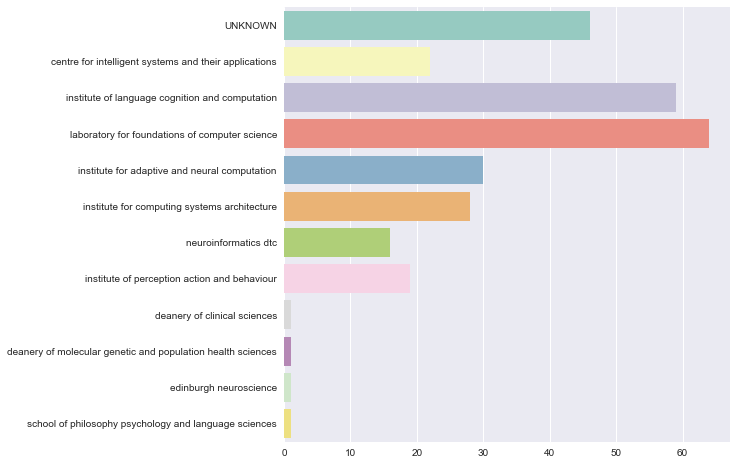

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.barplot(y, x, palette="Set3", ax=ax)
plt.savefig('./img/institute_distribution.pdf', format='pdf', bbox_inches='tight')

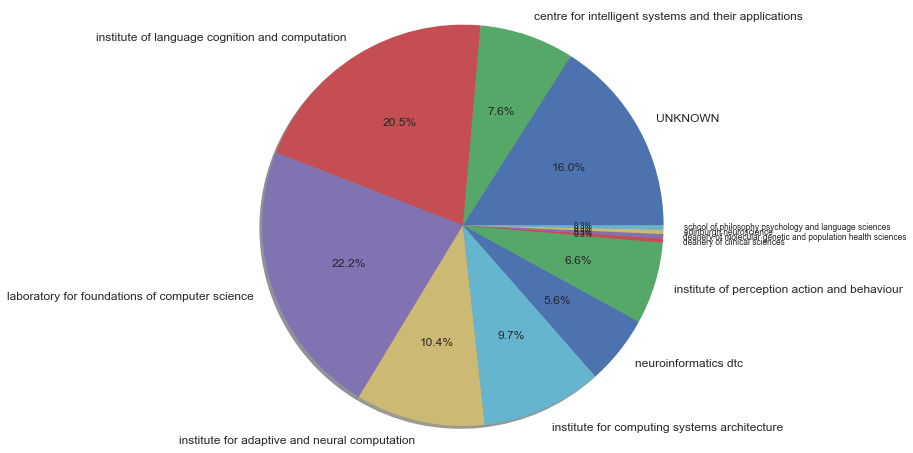

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
patches, texts, autotexts = ax.pie(
    y, labels=x, autopct='%1.1f%%', radius=1.5, shadow=True)
ax.axis('equal')
for t in texts:
    t.set_size('larger')
_ = [texts[t].set_size('smaller') for t in [8,9,10,11]]
for t in autotexts:
    t.set_size('larger')
_ = [autotexts[t].set_size('smaller') for t in [8,9,10,11]]
fig.savefig('./img/institute_distribution_pie.pdf', format='pdf',bbox_inches='tight')

## Distribution of publications (by year)

In [56]:
years = set()
data = {}
num_authors = {}

gb = lookup_pub.groupby('year')
for k, group in gb:
    if len(k) > 4:
        year = k[-2:]
        if int(year) > 17:  # 2017
            year = 1900 + int(year)
        else:
            year = 2000 + int(year)
    else:
        year = int(k)
    years.add(k)

    if year in data.keys():
        data[year] += len(group)
    else:
        data[year] = len(group)

    for pub in group.authors:
        num = len(pub.split("|"))
        if num in num_authors.keys():
            num_authors[num] += 1
        else:
            num_authors[num] = 1

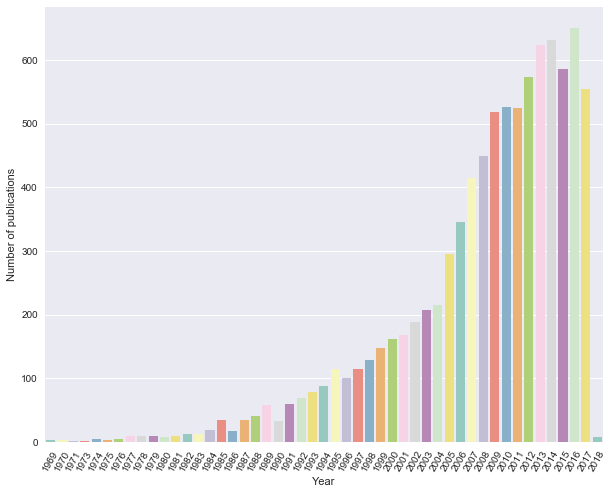

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.barplot(data.keys(), data.values(), ax=ax, palette="Set3")
ax.set_xticklabels(data.keys(), rotation=60)
ax.set_xlabel('Year')
ax.set_ylabel('Number of publications')
fig.savefig('./img/distr_pub_year.pdf', format='pdf', bbox_inches='tight')

## Distribution of publications (number of coauthors)

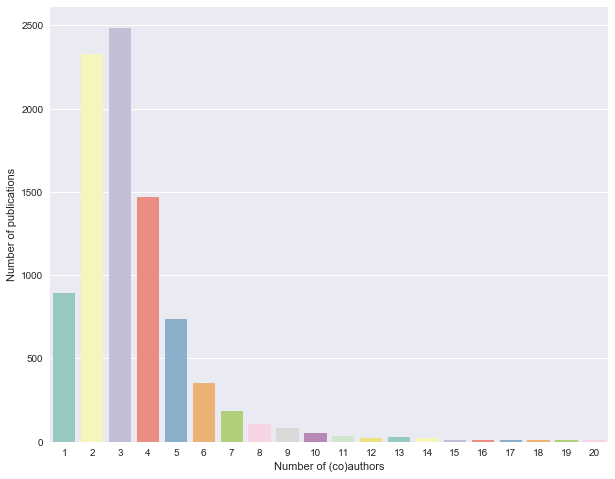

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.barplot(num_authors.keys(), num_authors.values(), ax=ax, palette="Set3")
ax.set_xlabel('Number of (co)authors')
ax.set_ylabel('Number of publications')
fig.savefig('./img/distr_pub_num_cauthors.pdf', format='pdf', bbox_inches='tight')